In [0]:
# Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#Loading the dataset in a loader


In [0]:
# Loading American AirLines Gropu lnc Stock Value

In [0]:
df = pd.read_csv("E:/deeplearning/RNNS/Stock Analysis/_content_individual_stocks_5yr_individual_stocks_5yr_AAL_data.csv")

In [90]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [91]:
df.shape

(1259, 7)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [0]:
import datetime
from datetime import datetime 

In [0]:
# Converting date column into datetime datatype 

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [0]:
train_df = df[df['date'].between('2013-01-01','2018-01-01')]
test_df = df[df['date'].between('2018-01-01','2018-02-08')]

In [98]:
print(train_df.shape)
test_df.shape

(1233, 7)


(26, 7)

In [0]:
# Use Opening Stock as an indicator to RNNS Stock market trend prediction

In [0]:
training_set = train_df.iloc[:,1:2].values

In [101]:
training_set.shape

(1233, 1)

In [0]:
# Feature Scaling
# Normalisation(Subtracting the xmin from x and dividing by xmax-xmin)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler(feature_range=(0,1))


In [0]:
training_set_scaled = sc.fit_transform(training_set)

In [106]:
training_set_scaled

array([[0.0451462 ],
       [0.04093567],
       [0.03064327],
       ...,
       [0.9277193 ],
       [0.91953216],
       [0.91883041]])

In [0]:
# Creating a data structure with 125 timesteps and 1 output


In [0]:
X_train = []
y_train = []
for i in range(125,1233):
  X_train.append(training_set_scaled[i-125:i,0])
  y_train.append(training_set_scaled[i,0])
  


In [108]:
print(len(X_train))
print(len(y_train))

1108
1108


In [0]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [110]:
X_train.shape

(1108, 125)

In [111]:
y_train.shape

(1108,)

In [112]:
# Reshaping the training data
print("The no of batches/training examples to the neural network   :  ",X_train.shape[0])
print("The no of time steps for RNN(Recurrent Neural Networks)   :  ",X_train.shape[1])

The no of batches/training examples to the neural network   :   1108
The no of time steps for RNN(Recurrent Neural Networks)   :   125


In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [114]:
X_train.shape

(1108, 125, 1)

In [0]:
# Part-2: Building the RNN

In [0]:
# Importing Keras Libraries And Packages

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [0]:
# Initializing Our RNN

In [0]:
regressor = Sequential()

In [0]:
#Adding the First LSTM Layer and some Dropout Regularization


In [0]:
regressor.add(LSTM(units=110, return_sequences = True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

In [0]:
#Adding the Second LSTM Layer and some Dropout Regularization

In [0]:
regressor.add(LSTM(units=110,return_sequences=True))
regressor.add(Dropout(0.3))

In [0]:
#Adding the Third LSTM Layer and some Dropout Regularization

In [0]:
regressor.add(LSTM(units=110,return_sequences=True))
regressor.add(Dropout(0.25))

In [0]:
#Adding the Fourth LSTM Layer and some Dropout Regularization

In [0]:
regressor.add(LSTM(units=125,return_sequences=False))
regressor.add(Dropout(0.25))

In [0]:
# Adding the output Dense Layer

In [0]:
regressor.add(Dense(units=1))

In [0]:
# Compiling the model

In [0]:
 regressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
# Fitting the RNN to the Training Set

In [132]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
35/35 [==============================] - 19s 532ms/step - loss: 0.0692
Epoch 2/100
35/35 [==============================] - 19s 534ms/step - loss: 0.0115
Epoch 3/100
35/35 [==============================] - 19s 536ms/step - loss: 0.0077
Epoch 4/100
35/35 [==============================] - 23s 648ms/step - loss: 0.0068
Epoch 5/100
35/35 [==============================] - 19s 535ms/step - loss: 0.0065
Epoch 6/100
35/35 [==============================] - 19s 533ms/step - loss: 0.0063
Epoch 7/100
35/35 [==============================] - 18s 528ms/step - loss: 0.0059
Epoch 8/100
35/35 [==============================] - 19s 530ms/step - loss: 0.0070
Epoch 9/100
35/35 [==============================] - 19s 532ms/step - loss: 0.0066
Epoch 10/100
35/35 [==============================] - 19s 535ms/step - loss: 0.0055
Epoch 11/100
35/35 [==============================] - 19s 532ms/step - loss: 0.0059
Epoch 12/100
35/35 [==============================] - 19s 533ms/step - loss: 0.0058
E

In [0]:
# # serialize model to JSON
# regressor_model_json = regressor.to_json()
# with open("regressor_model.json", "w") as json_file:
#     json_file.write(regressor_model_json)
# # serialize weights to HDF5
# regressor.save_weights("model.h5")
# print("Saved model to disk")
 

Saved model to disk


In [0]:
#Making the Predictions and visualising the results

In [0]:
#Getting the real stock price of 2018


In [0]:
real_stock_price = test_df.iloc[:,1:2].values

In [134]:
real_stock_price.shape

(26, 1)

In [0]:
# Getting the predicted stock price of 2017


In [0]:
dataset_total = pd.concat((train_df['open'],test_df['open']),axis=0)

In [136]:
dataset_total.shape

(1259,)

In [0]:
inputs = dataset_total[len(dataset_total)-len(test_df)-125:].values

In [138]:
inputs.shape

(151,)

In [0]:
inputs = inputs.reshape(-1,1)

In [140]:
inputs.shape

(151, 1)

In [0]:
# Scaling the inputs

In [0]:
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(125,151):
  X_test.append(inputs[i-125:i,0])
X_test = np.array(X_test)


In [0]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [145]:
X_test.shape

(26, 125, 1)

In [0]:
predicted_stock_price = regressor.predict(X_test)

In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
# Visualising the results

In [0]:
import matplotlib.pyplot as plt

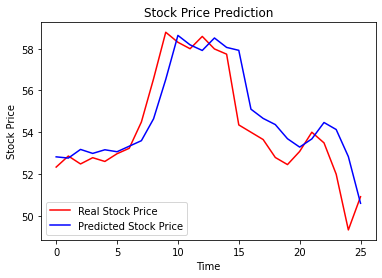

In [150]:
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title("Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()